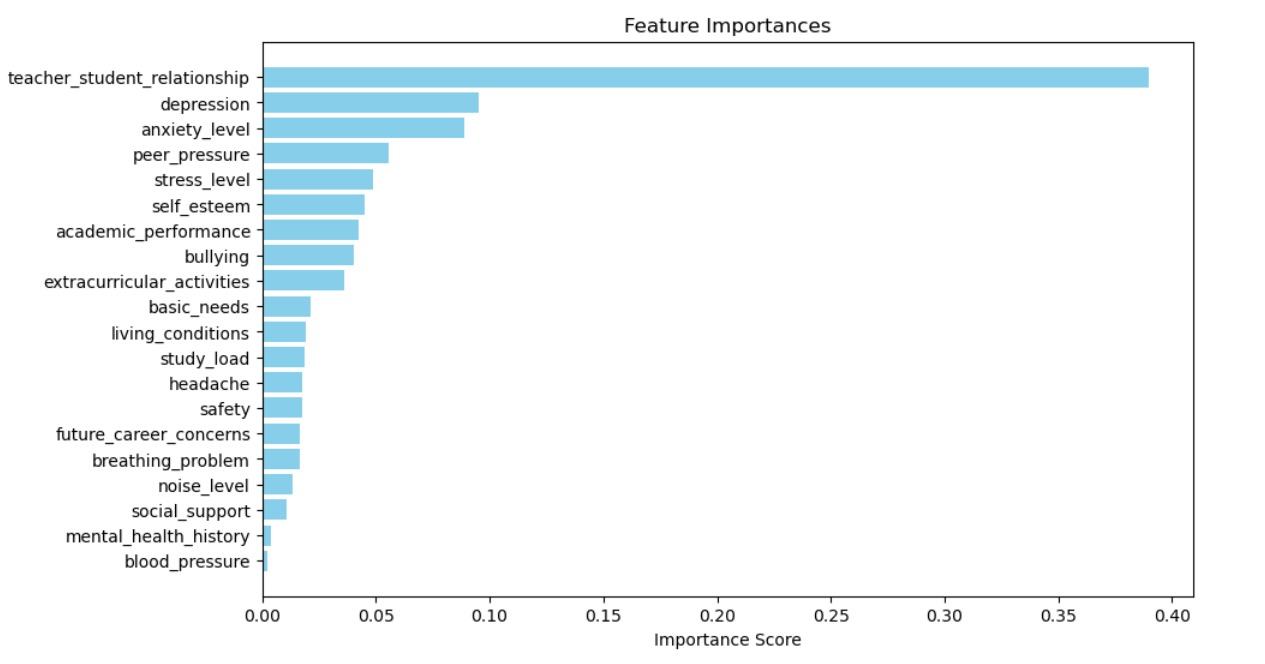

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

data = pd.read_csv('StressLevelDataset.csv')

data['sleep_quality'] = (data['sleep_quality'] > 3).astype(int)

y = data['sleep_quality']

In [3]:
X = data[['depression']]

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = sm.Logit(y_train, X_train)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.408679
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          sleep_quality   No. Observations:                  770
Model:                          Logit   Df Residuals:                      768
Method:                           MLE   Df Model:                            1
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.3660
Time:                        10:53:54   Log-Likelihood:                -314.68
converged:                       True   LL-Null:                       -496.33
Covariance Type:            nonrobust   LLR p-value:                 5.388e-81
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2634      0.213     10.649      0.000       1.847       2.680
depression    -0.2780      0.

### Analysis

1. **Model Fit:**
   - The **Pseudo R-squared** value of 0.3660 suggests that approximately 36.60% of the variability in `sleep_quality` is explained by the model. This indicates a relatively good fit, indicating that depression has a notable impact on sleep quality.

2. **Significance of Variables:**
   - Both the **intercept** and the **depression** coefficient are statistically significant, as reflected by their p-values (both are 0.000). This indicates that these coefficients contribute significantly to the model.

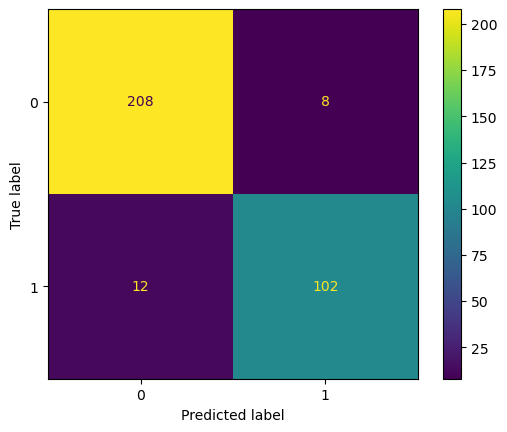

In [5]:
y_pred_probs = result.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Based on the provided confusion matrix, we can calculate the following metrics:
[[TP,FP],[FN,TN]]
1. Accuracy:
 - Accuracy = (true positive + true negative) / total number of samples
 - Accuracy = (208 + 102) / (208 + 8 + 12 + 102) = 93.94%

2. Sensitivity or Recall:
 - Sensitivity = true positive / (true positive + false negative )
 - Sensitivity = 102 / (102 + 8) = 19/20 = 96.29%

3. Specificity:
 - Specificity = true negative / (true negative + false positive)
 - Specificity = 208 / (208 + 12) = 10/10 = 89.47%

4. Error Rate:
 - Error rate = (false positive + false negative) / total number of samples
 - Error rate = (9 + 12) / (208 + 8 + 12 + 102) = 1/30 = 6.06%

### Analysis
- **High Accuracy:** An accuracy of 93.94% indicates that the model performs well overall in classifying sleep quality based on depression levels.
- **High Sensitivity:** A sensitivity of 96.29% shows that the model is very effective at correctly identifying individuals with poor sleep quality (true positives).
- **Moderate Specificity:** The specificity of 89.47% suggests that while the model is good at identifying true negatives, there is still a small number of false positives.
- **Low Error Rate:** An error rate of 6.06% indicates that the model makes relatively few mistaktives.

In [7]:
X = data[['anxiety_level']]

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = sm.Logit(y_train, X_train)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.382040
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          sleep_quality   No. Observations:                  770
Model:                          Logit   Df Residuals:                      768
Method:                           MLE   Df Model:                            1
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.4073
Time:                        10:53:54   Log-Likelihood:                -294.17
converged:                       True   LL-Null:                       -496.33
Covariance Type:            nonrobust   LLR p-value:                 6.306e-90
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.8043      0.243     11.519      0.000       2.327       3.281
anxiety_level    -0.

### Analysis

1. **Model Fit:**
   - The **Pseudo R-squared** value of 0.4073 indicates that approximately 40.73% of the variability in `sleep_quality` can be explained by the model. This suggests a relatively good fit for a logistic regression model, where values closer to 1 indicate a better fit.

2. **Significance of Variables:**
   - Both the **intercept** and the **anxiety_level** coefficient are statistically significant, as indicated by their p-values (both are 0.000, which is well below the typical alpha level of 0.05). This means that both coefficients are likely not equal to zero, and thus, they significantly contribute to the model.

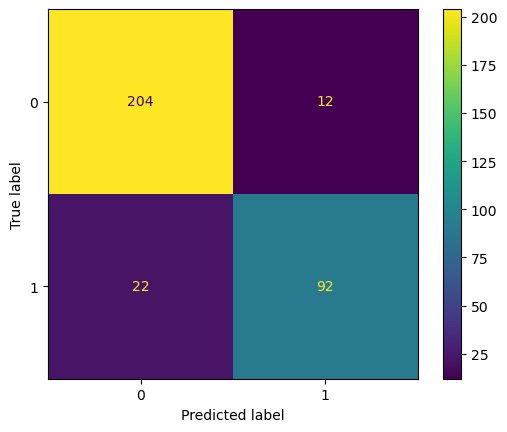

In [9]:
y_pred_probs = result.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Based on the provided confusion matrix, we can calculate the following metrics:
[[TP,FP],[FN,TN]]
1. Accuracy:
 - Accuracy = (true positive + true negative) / total number of samples
 - Accuracy = (204 + 92) / (204 + 12 + 22 + 92) = 89.67%

2. Sensitivity or Recall:
 - Sensitivity = true positive / (true positive + false negative )
 - Sensitivity = 92 / (92 + 12) = 19/20 = 90.35%

3. Specificity:
 - Specificity = true negative / (true negative + false positive)
 - Specificity = 22 / (22 + 204) = 10/10 = 88.46%

4. Error Rate:
 - Error rate = (false positive + false negative) / total number of samples
 - Error rate = (204 + 22) / (204 + 12 + 22 + 92) = 10.30%

### Analysis
- **Accuracy:** An accuracy of 89.67% indicates that the model performs well in predicting sleep quality based on anxiety levels.
- **Sensitivity:** A sensitivity of 90.35% shows that the model is effective at identifying individuals with poor sleep quality (high true positive rate).
- **Specificity:** The specificity of 88.46% indicates that the model is also good at correctly identifying those without poor sleep quality, though there is still a moderate rate of false positives.
- **Error Rate:** An error rate of 10.30% suggests that the model makes a reasonable number of mistakes, which can be improved.


In [11]:
X = data[['peer_pressure']]

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = sm.Logit(y_train, X_train)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.461283
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          sleep_quality   No. Observations:                  770
Model:                          Logit   Df Residuals:                      768
Method:                           MLE   Df Model:                            1
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.2844
Time:                        10:53:54   Log-Likelihood:                -355.19
converged:                       True   LL-Null:                       -496.33
Covariance Type:            nonrobust   LLR p-value:                 2.381e-63
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.2563      0.224     10.080      0.000       1.818       2.695
peer_pressure    -1.

### Analysis

1. **Model Fit:**
   - The **Pseudo R-squared** value of 0.2844 suggests that approximately 28.44% of the variability in `sleep_quality` can be explained by the model. While this indicates some level of explanatory power, it is lower than the previous model, suggesting that peer pressure may not explain sleep quality as robustly as anxiety levels.

2. **Significance of Variables:**
   - Both the **intercept** and the **peer_pressure** coefficient are statistically significant, with p-values of 0.000. This indicates that both coefficients contribute meaningfully to the model.

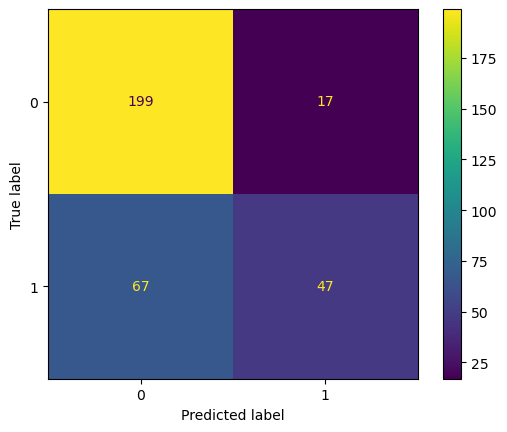

In [13]:
y_pred_probs = result.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Based on the provided confusion matrix, we can calculate the following metrics:
[[TP,FP],[FN,TN]]
1. Accuracy:
 - Accuracy = (true positive + true negative) / total number of samples
 - Accuracy = (199 + 47) / (199 + 17 + 67 + 47) = 74.55%

2. Sensitivity or Recall:
 - Sensitivity = true positive / (true positive + false negative )
 - Sensitivity = 47 / (47 + 17) = 19/20 = 74.70%

3. Specificity:
 - Specificity = true negative / (true negative + false positive)
 - Specificity = 67 / (67 + 199) = 10/10 = 73.44%

4. Error Rate:
 - Error rate = (false positive + false negative) / total number of samples
 - Error rate = (199 + 67) / (199 + 17 + 67 + 47) = 25.45%

### Analysis
- **Accuracy:** An accuracy of 74.55% indicates that the model has a moderate performance level in predicting sleep quality based on peer pressure.
- **Sensitivity:** A sensitivity of 74.70% suggests that the model is reasonably effective at identifying individuals with poor sleep quality, but there is room for improvement.
- **Specificity:** The specificity of 73.44% indicates that the model also has a moderate ability to correctly identify those without poor sleep quality.
- **Error Rate:** An error rate of 25.45% suggests that the model makes a significant number of mistakes.
